1. Dependancy Installation

In [1]:
import sys
sys.path.append("../") # go to parent dir
from mrcnn_n import *
from mrcnn_n.visualize import random_colors, get_mask_contours, draw_mask
from mrcnn_n import *
import cv2
%matplotlib inline

In [2]:
import tensorflow as tf 
print(tf.__version__)

2.0.0


## 2. Run Mask-RCNN on Images


In [3]:
# Load Image
# train_annotations_path = "../dataset/tb_dataset_v6/train.json"
# val_annotations_path = "../dataset/tb_dataset_v6/test.json"

# dataset_train = m_rcnn.load_image_dataset(os.path.join( train_annotations_path), "../dataset/tb_dataset_v6/train", "train")
# dataset_val = m_rcnn.load_image_dataset(os.path.join( val_annotations_path), "../dataset/tb_dataset_v6/test", "val")
# class_number = dataset_train.count_classes()

# print("Classes: {}".format(class_number))

In [13]:
import cv2
import numpy as np
from mrcnn_n.m_rcnn import load_inference_model
from skimage.color import rgb2gray
from skimage.filters import threshold_multiotsu
from skimage import data, io, img_as_ubyte
import matplotlib.pyplot as plt

path ="../test/tb/tb123.png"

image_output_path = "../assets/output/masdetection_image.png"
read_image = cv2.imread(path, 1)
print(read_image)

rgb2gray_image = rgb2gray(read_image)
threshold = threshold_multiotsu(rgb2gray_image, classes=5)

regions = np.digitize(rgb2gray_image, bins=threshold)

mas_image = img_as_ubyte(regions)
plt.imsave(image_output_path, mas_image)

from PIL import Image

image = Image.open("../assets/output/masdetection_image.png")
print(f"Original size : {image.size}") # 5464x3640

sunset_resized = image.resize((400, 400))
sunset_resized.save('sunset_400.png')

[[[ 64  64  64]
  [ 67  67  67]
  [ 64  64  64]
  ...
  [108 108 108]
  [105 105 105]
  [106 106 106]]

 [[ 69  69  69]
  [ 69  69  69]
  [ 70  70  70]
  ...
  [113 113 113]
  [114 114 114]
  [114 114 114]]

 [[ 74  74  74]
  [ 72  72  72]
  [ 75  75  75]
  ...
  [114 114 114]
  [116 116 116]
  [117 117 117]]

 ...

 [[212 212 212]
  [218 218 218]
  [120 120 120]
  ...
  [177 177 177]
  [179 179 179]
  [184 184 184]]

 [[196 196 196]
  [220 220 220]
  [135 135 135]
  ...
  [176 176 176]
  [173 173 173]
  [181 181 181]]

 [[190 190 190]
  [221 221 221]
  [157 157 157]
  ...
  [176 176 176]
  [177 177 177]
  [169 169 169]]]
Original size : (353, 373)


In [7]:
path = "sunset_400.png"
img = cv2.imread(path)

test_model, inference_config = load_inference_model(1, "../model/tuberculosis/tb_model_v8.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Loading weights from  ../model/tuberculosis/tb_model_v8.h5


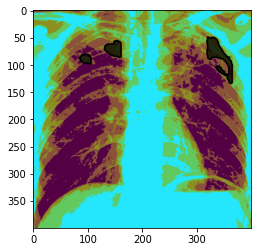

mask_array====> [[array([[106,  98],
       [105,  98],
       [104,  98],
       [103,  98],
       [102,  98],
       [101,  98],
       [100,  98],
       [ 99,  98],
       [ 99,  97],
       [ 98,  97],
       [ 97,  97],
       [ 96,  97],
       [ 95,  97],
       [ 94,  97],
       [ 93,  97],
       [ 93,  96],
       [ 92,  96],
       [ 91,  96],
       [ 91,  95],
       [ 90,  95],
       [ 90,  94],
       [ 89,  94],
       [ 89,  93],
       [ 88,  93],
       [ 87,  93],
       [ 87,  92],
       [ 87,  91],
       [ 86,  91],
       [ 86,  90],
       [ 86,  89],
       [ 85,  89],
       [ 85,  88],
       [ 86,  87],
       [ 86,  87],
       [ 86,  86],
       [ 87,  85],
       [ 87,  85],
       [ 88,  84],
       [ 88,  84],
       [ 89,  83],
       [ 89,  83],
       [ 90,  82],
       [ 91,  82],
       [ 92,  82],
       [ 93,  82],
       [ 93,  82],
       [ 94,  81],
       [ 95,  81],
       [ 96,  81],
       [ 97,  81],
       [ 98,  81],
       [ 99, 

FileNotFoundError: [Errno 2] No such file or directory: '../test/tb/tb123.png'

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
mask_array=[]
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    # print("mask====>",mask)
    contours = get_mask_contours(mask)
    # print("contours====>",contours)
    mask_array.append(contours)
    for cnt in contours:
        # print("cnt====>",[cnt])
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
# cv2.Waitkey(10000)
# cv2.imshow("img",img)
plt.imsave("step1_lc_output.png", img)
plt.imshow(img)
plt.show()
print("mask_array====>",mask_array)


import json
from json import JSONEncoder
import numpy

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

numpyArrayOne = numpy.array([[11, 22, 33], [44, 55, 66], [77, 88, 99]])

# Serialization
numpyData = {"array": mask_array}
encodedNumpyData = json.dumps(numpyData, cls=NumpyArrayEncoder)  # use dump() to write array into file
# print("Printing JSON serialized NumPy array")
# print(encodedNumpyData)

with open('output.json', 'w') as outfile:
    json.dump(encodedNumpyData, outfile)

# import json
# print("Decode JSON serialized NumPy array")
# decodedArrays = json.loads(encodedNumpyData)

with open('output.json') as json_file:
    data = json.load(json_file)
    decodedArrays = json.loads(data)
    array = numpy.asarray(decodedArrays["array"])
    print("NumPy Array======>",array)
    


In [15]:
filepath ="../test/tb/tb123.png"
with open(filepath,'rb') as File:
    BinaryData = File.read()
print("BinaryData===>"+str(BinaryData))

BinaryData===>b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01a\x00\x00\x01u\x08\x06\x00\x00\x009\xb8[Z\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\xff\xa5IDATx^l\xddK\xaf\xa6E\xd5\xc6\xf1\xbd}\x10\x15\x10\xcf\x88@s0h\x8c\x06\x07\x0eL\x8c\x13\x06h\x02\x11\xc4\xa0qd\x14\x90\x83\x80hL\x8c8\xdbC\xfd\n~\x05\x13\x13\'~\x03\x12\xa7\x06LC\xd3\xd84(\x1e\xf0\x88rP\xc4\xfd\xf6\xaf\xde\xfe?Y\xdca%\x95\xaaZ\xb5\xd6\xb5\xae\xb5\xaa\xeez\xee\xfd\xec\xddpx\xe3\x8d7\x1e\xefv\xbb\x83\xd7_\x7f\xfd\xe0\x82\x0b.88<<\\\xed-oy\xcbj\xff\xfb\xdf\xff\x0e\x88~\xae\xbd\xf5\xado]c\xbdy\xfed;\xe7+FB\xcf\xef\xbf\xff\xfd\xef\xc2\xb0\xa6\'\xe1\xcf\x18\xc7\xc7\xc7k-\x9d>l\x18\x17^x\xe1\xde\xff\xb5\xd7^[k\xf48\xbc\xfa\xea\xabk\x8c\x835\xbe\xf0\xcc\xeb\xad\xc3\xc5\xc3\\{\xfb\xdb\xdf\xbe\xfa\xb8\xc1\xd4\xc7\xcfZX\xe9\xf4\xe5\xd9\x9a\xf9\x15W\\q\xf0\xc1\x0f~\xf0\xe0}\xef{\xdfZ\xc3\xe9_\xff\xfa\xd7\x8a\xf9\

In [ ]:
#bulb cordinates
bulb_arr=[
[50,50],[120,50],       [250,50],[300,50],[350,50],
[45,75],[75,75],[100,75],     [220,75],[240,75],[275,75],[320,75],[360,75],
[40,100],[45,100],[90,100],[110,100],      [210,100],[230,100],[275,100],[320,100],[360,100],
[35,125],[40,125],[60,125],[100,125],      [200,125],[220,125],[265,125],[310,125],[325,125],[365,125],
[25,150],[50,150],[75,150],[100,150],      [200,150],[240,150],[260,150],[300,150],[345,150],[367,150],
[23,175],[45,175],[65,175],[95,175],[120,175],    [210,175],[242,175],[265,175],[310,175],[355,175],[367,175],
[23,200],[45,200],[65,200],[95,200],[120,200],    [245,200],[265,200],[310,200],[355,200],[367,200],
[20,225],[50,225],[75,225],[100,225],[120,225],     [265,225],[310,225],[355,225],[367,225],
[17,250],[45,250],[55,250],[85,250],[100,250],[120,250],   [270,250],[310,250],[355,225],[367,225],
[25,300],[50,300],[75,300],[100,300],[100,250],       [275,250],[310,250],[355,225],[367,225],
[25,325],[50,325],[75,325],[100,325],[100,325],       [275,325],[310,325],[355,325],[367,325]
]

cod_json = []
#bulb cordinates populate
if(len(bulb_arr)>0):
    for l in range(len(bulb_arr)):
        #polygon array
        if(len(array)>0):
            for i in range(len(array)):
                for j in range(len(array[i])):
                    diff =[]
                    for k in range(len(array[i][j])):
                        #y value equalization
                        if(bulb_arr[l][1]== array[i][j][k][1]): 
                            print("check y value same with polygon",array[i][j][k])
                            diff.append(array[i][j][k])
                            if(len(diff)>0):
                                print(diff)
                                length_diff = len(diff)
                                print(diff[0][0])
                                print(diff[length_diff-1][0]) 
                                #x value range check
                                if diff[0][0] <= bulb_arr[l][0] <= diff[length_diff-1][0]:
                                    cod_json.append(bulb_arr[l])    

               
print("json==>",cod_json)
#check duplicate cordinates
set_bulb_arr = []
for i in range(len(bulb_arr)):
    for j in range(len(cod_json)):
        if(bulb_arr[i]==cod_json[j]):
            set_bulb_arr.append(i+1)

mylist = sorted(set(set_bulb_arr))
print(mylist)

check y value same with polygon [320, 50]
[[320, 50]]
320
320
check y value same with polygon [322, 50]
[[320, 50], [322, 50]]
320
322
check y value same with polygon [323, 50]
[[320, 50], [322, 50], [323, 50]]
320
323
check y value same with polygon [327, 50]
[[320, 50], [322, 50], [323, 50], [327, 50]]
320
327
check y value same with polygon [328, 50]
[[320, 50], [322, 50], [323, 50], [327, 50], [328, 50]]
320
328
check y value same with polygon [329, 50]
[[320, 50], [322, 50], [323, 50], [327, 50], [328, 50], [329, 50]]
320
329
check y value same with polygon [330, 50]
[[320, 50], [322, 50], [323, 50], [327, 50], [328, 50], [329, 50], [330, 50]]
320
330
check y value same with polygon [331, 50]
[[320, 50], [322, 50], [323, 50], [327, 50], [328, 50], [329, 50], [330, 50], [331, 50]]
320
331
check y value same with polygon [332, 50]
[[320, 50], [322, 50], [323, 50], [327, 50], [328, 50], [329, 50], [330, 50], [331, 50], [332, 50]]
320
332
check y value same with polygon [333, 50]
[[32

In [ ]:
bulb_cordinates=[
[50,50],[120,50],       [250,50],[300,50],[350,50],
[45,75],[75,75],[100,75],     [220,75],[240,75],[275,75],[320,75],[360,75],(13)
[40,100],[45,100],[90,100],[110,100],      [210,100],[230,100],[275,100],[320,100],[360,100],(22)
[35,125],[40,125],[60,125],[100,125],      [200,125],[220,125],[265,125],[310,125],[325,125],[365,125](32)
[25,150],[50,150],[75,150],[100,150],      [200,150],[240,150],[260,150],[300,150],[345,150],[367,150],(42)
[23,175],[45,175],[65,175],[95,175],[120,175],    [210,175],[242,175],[265,175],[310,175],[355,175],[367,175],(53)
[23,200],[45,200],[65,200],[95,200],[120,200],    [245,200],[265,200],[310,200],[355,200],[367,200],(63)
[20,225],[50,225],[75,225],[100,225],[120,225],     [265,225],[310,225],[355,225],[367,225],(72)
[17,250],[45,250],[55,250],[85,250],[100,250],[120,250],   [270,250],[310,250],[355,225],[367,225],(82)
[25,300],[50,300],[75,300],[100,300],[100,250],      [275,250],[310,250],[355,225],[367,225],(91)
[25,325],[50,325],[75,325],[100,325],[100,325],       [275,325],[310,325],[355,325],[367,325],(100)
]

print(len(bulb_cordinates))

TypeError: 'int' object is not subscriptable

## 3. Model Accuracy

In [ ]:
print(test_model.keras_model.summary())

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

In [ ]:
# Running on 30 images. Increase for better accuracy.

from model_accuracy import *
model_accuracy(dataset_train, dataset_val, test_model, inference_config, modellib,utils)

ModuleNotFoundError: No module named 'model_accuracy'